In [2]:
# Original random selected line_id [Row(line_number='2435', complement='10', line_id=210, direction=1)]
# Shapes candidates 58695 and 53709

In [3]:
import pandas as pd

shape_53709 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_shape_53709.csv",header=None)
shape_58695 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_shape_58695.csv",header=None)
trace_line_210 = pd.read_csv("./testing-map-views-sample-data/1-shapes-direction-AL-file/day_15101_line_210.csv",header=None)

In [4]:
shape_53709.columns = ["shape_id","lat","lon","sequence","dist"]
shape_53709_x = list(shape_53709["lon"])
shape_53709_y = list(shape_53709["lat"])


shape_58695.columns = ["shape_id","lat","lon","sequence","dist"]
shape_58695_x = list(shape_58695["lon"])
shape_58695_y = list(shape_58695["lat"])

trace_line_210.columns = ["dt_avl","line_id","lat","lon","id_avl","hour_avl","hour_diff",'region',"time_variation"]
traces_first_50_x = list(trace_line_210["lon"])[:50]
traces_first_50_y = list(trace_line_210["lat"])[:50]
traces_first_50_hour = list(trace_line_210["dt_avl"])[:50]



In [5]:
traces_first_50_hour

['2015-10-01 06:13:57.000',
 '2015-10-01 06:14:42.000',
 '2015-10-01 06:15:27.000',
 '2015-10-01 06:16:12.000',
 '2015-10-01 06:16:28.000',
 '2015-10-01 06:17:13.000',
 '2015-10-01 06:17:58.000',
 '2015-10-01 06:18:43.000',
 '2015-10-01 06:19:28.000',
 '2015-10-01 06:20:13.000',
 '2015-10-01 06:20:58.000',
 '2015-10-01 06:21:23.000',
 '2015-10-01 06:22:08.000',
 '2015-10-01 06:22:53.000',
 '2015-10-01 06:23:38.000',
 '2015-10-01 06:24:23.000',
 '2015-10-01 06:25:08.000',
 '2015-10-01 06:25:53.000',
 '2015-10-01 06:26:38.000',
 '2015-10-01 06:27:23.000',
 '2015-10-01 06:28:08.000',
 '2015-10-01 06:29:21.000',
 '2015-10-01 06:30:06.000',
 '2015-10-01 06:30:51.000',
 '2015-10-01 06:31:36.000',
 '2015-10-01 06:32:21.000',
 '2015-10-01 06:33:06.000',
 '2015-10-01 06:33:51.000',
 '2015-10-01 06:34:36.000',
 '2015-10-01 06:35:21.000',
 '2015-10-01 06:36:06.000',
 '2015-10-01 06:36:51.000',
 '2015-10-01 06:37:37.000',
 '2015-10-01 06:38:22.000',
 '2015-10-01 06:39:07.000',
 '2015-10-01 06:39:5

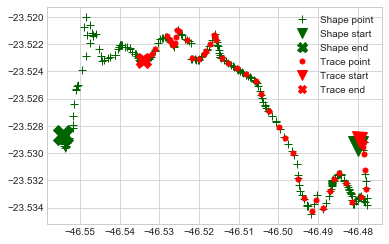

In [39]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

# Shape 58695 of the trip 2435-10-0 (direction = 0)
plt.plot(shape_58695_x, shape_58695_y, '+', color='darkgreen',markersize=8,label="Shape point")

# Plotting the start/final point of the shape
plt.plot(shape_58695_x[0], shape_58695_y[0], 'v', color='darkgreen',markersize=20,label="Shape start")
plt.plot(shape_58695_x[-1],shape_58695_y[-1], 'X', color='darkgreen',markersize=20,label="Shape end")

plt.plot(traces_first_50_x, traces_first_50_y,".", color='red',markersize=10,label="Trace point")

# Plotting the start/final point of the Trace with line_id = 210
plt.plot(traces_first_50_x[0], traces_first_50_y[0], 'v', color='red',markersize=15,label="Trace start")
plt.plot(traces_first_50_x[-1], traces_first_50_y[-1], 'X', color='red',markersize=15,label="Trace end")


lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)


lgnd.legendHandles[0]._legmarker.set_markersize(8)
lgnd.legendHandles[1]._legmarker.set_markersize(10)
lgnd.legendHandles[2]._legmarker.set_markersize(10)
lgnd.legendHandles[3]._legmarker.set_markersize(10)
lgnd.legendHandles[4]._legmarker.set_markersize(10)
lgnd.legendHandles[5]._legmarker.set_markersize(8)

# saving image
plt.savefig('shape-direction-58695.png',bbox_inches='tight',dpi=300)

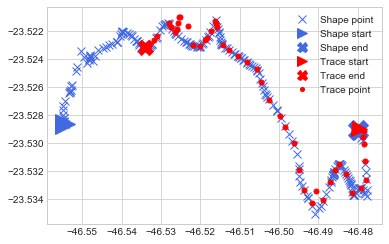

In [38]:
#Shape 53709 of the trip 2435-10-1 (direction = 1)
plt.plot(shape_53709_x, shape_53709_y, 'x', color='royalblue',markersize=8,label="Shape point")

# Plotting the start/final point of the shape
plt.plot(shape_53709_x[0], shape_53709_y[0], '>', color='royalblue',markersize=20,label="Shape start")
plt.plot(shape_53709_x[-1], shape_53709_y[-1], 'X', color='royalblue',markersize=20,label="Shape end")

# Plotting the start/final point of the Trace with line_id = 210
plt.plot(traces_first_50_x[0], traces_first_50_y[0], '>', color='red',markersize=15,label="Trace start")
plt.plot(traces_first_50_x[-1], traces_first_50_y[-1], 'X', color='red',markersize=15,label="Trace end")

plt.plot(traces_first_50_x, traces_first_50_y,".", color='red',markersize=10,label="Trace point")

lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)

lgnd.legendHandles[0]._legmarker.set_markersize(8)
lgnd.legendHandles[1]._legmarker.set_markersize(10)
lgnd.legendHandles[2]._legmarker.set_markersize(10)
lgnd.legendHandles[3]._legmarker.set_markersize(10)
lgnd.legendHandles[4]._legmarker.set_markersize(10)
lgnd.legendHandles[5]._legmarker.set_markersize(8)

# Saving image
plt.savefig('shape-direction-53709.png',bbox_inches='tight',dpi=300)

In [36]:
# Results in AL file the direction 1 is equals to direction 0 on GTFS files, and 2 is equals to 1 in the GTFS file